In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout
from tensorflow.keras.losses import BinaryCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

import cv2
import pathlib
from glob import glob

In [ ]:
pic_path=pathlib.Path('/content/drive/MyDrive/Colab Notebooks/data/Training')

In [ ]:
early_list=list(pic_path.glob('Early_Blight/*'))
healthy_list=list(pic_path.glob('Healthy/*'))
late_list=list(pic_path.glob('Late_Blight/*'))

In [ ]:
len(early_list)

1303

In [ ]:
len(healthy_list)

816

In [ ]:
len(late_list)

1132

In [ ]:
pic_dict={'early':early_list,'healthy':healthy_list,'late':late_list}

In [ ]:
pic_class={'early':0,'healthy':1,'late':2}

In [ ]:
x=[]
y=[]
for i in pic_dict:
  for j in pic_dict[i]:
    img=cv2.imread(str(j))
    img=cv2.resize(img,(100,100))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    x.append(img)
    y.append(pic_class[i])

In [ ]:
len(x)

3251

In [ ]:
len(y)

3251

In [ ]:
x=np.array(x)
y=np.array(y)

In [ ]:
x.shape

(3251, 100, 100, 3)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [ ]:
len(x_train)

2438

In [ ]:
len(x_test)

813

In [ ]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(100,100,3),activation='relu',padding='valid',strides=1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='valid',strides=1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='valid',strides=1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))

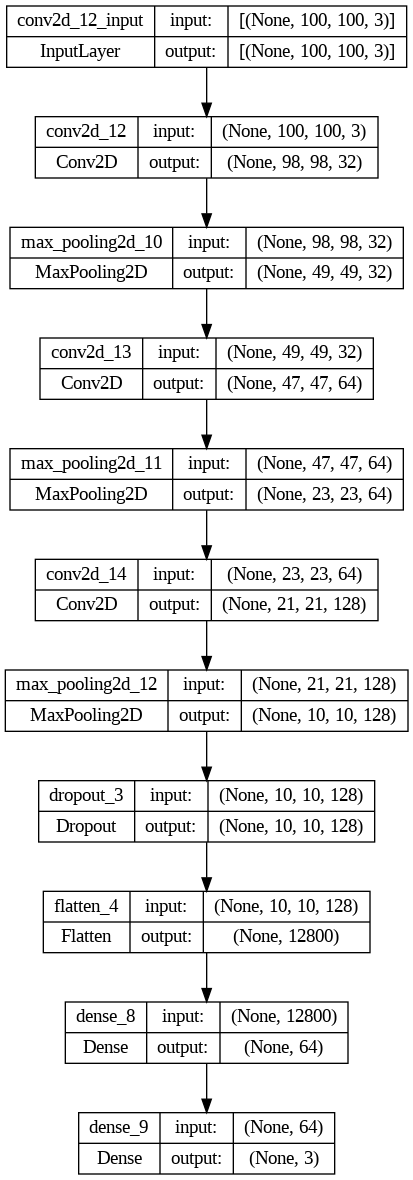

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model,to_file='model.png',show_shapes=True,show_layer_names=True)

In [ ]:
model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer=Adam(),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 49, 49, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 23, 23, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 10, 10, 128)      

In [ ]:
hist=model.fit(x_train,y_train,epochs=75,validation_data=(x_test,y_test),batch_size=512)

Epoch 1/75
5/5 [==============================] - 2s 233ms/step - loss: 50.2655 - accuracy: 0.3351 - val_loss: 1.2543 - val_accuracy: 0.3641
Epoch 2/75
5/5 [==============================] - 1s 173ms/step - loss: 1.2364 - accuracy: 0.3835 - val_loss: 1.0544 - val_accuracy: 0.4391
Epoch 3/75
5/5 [==============================] - 1s 172ms/step - loss: 1.0850 - accuracy: 0.4352 - val_loss: 1.0156 - val_accuracy: 0.4317
Epoch 4/75
5/5 [==============================] - 1s 173ms/step - loss: 1.0046 - accuracy: 0.4914 - val_loss: 0.9710 - val_accuracy: 0.5363
Epoch 5/75
5/5 [==============================] - 1s 173ms/step - loss: 0.9644 - accuracy: 0.5263 - val_loss: 0.9222 - val_accuracy: 0.6150
Epoch 6/75
5/5 [==============================] - 1s 174ms/step - loss: 0.9194 - accuracy: 0.5788 - val_loss: 0.9028 - val_accuracy: 0.6089
Epoch 7/75
5/5 [==============================] - 1s 182ms/step - loss: 0.8994 - accuracy: 0.5997 - val_loss: 0.8664 - val_accuracy: 0.6261
Epoch 8/75
5/5 [===

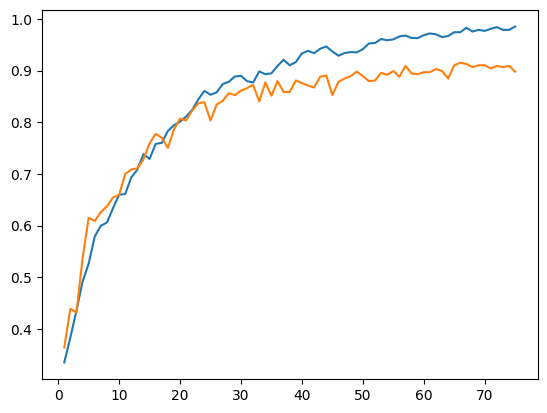

In [ ]:
plt.plot(range(1,76),hist.history['accuracy'])
plt.plot(range(1,76),hist.history['val_accuracy'])

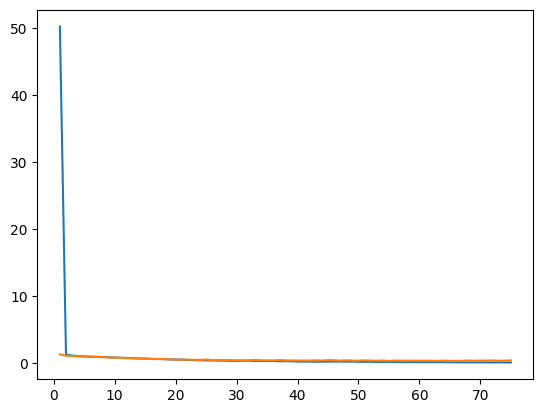

In [ ]:
plt.plot(range(1,76),hist.history['loss'])
plt.plot(range(1,76),hist.history['val_loss'])

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/data/potato.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 180ms/step


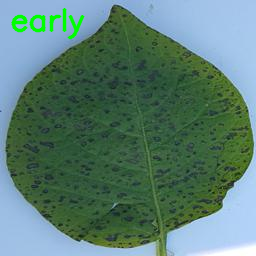

In [ ]:
import cv2
import numpy as np
import tensorflow as tf

from google.colab.patches import cv2_imshow
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/data/potato.h5')
labels = {0: 'early', 1: 'healthy', 2: 'late'}
def detect_faces(frame):
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized_frame = cv2.resize(rgb_frame, (100, 100))
    resized_frame = np.expand_dims(resized_frame, axis=0)
    pred = model.predict(resized_frame)
    label = labels[pred.argmax()]
    cv2.putText(frame, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    return frame
image_path = '/content/Early_Blight_1.jpg'
frame = cv2.imread(image_path)
if frame is None:
    print("Error: Unable to load image.")
    exit()
output_image = detect_faces(frame)
cv2_imshow(output_image)
cv2.waitKey(0)
cv2.destroyAllWindows()